In [1]:
import xarray as xr
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

import cartopy.crs as ccrs

In [2]:
ds = pd.read_csv('data/GDP/interpolated_gld.20221202_104507')

bathy = xr.open_dataset('data/bathy/GEBCO_02_Dec_2022_8bb5cd71a07e/gebco_2022_n62.0_s59.0_w-49.0_e-40.0.nc')

In [3]:
id_drift= np.array([ds.iloc[i].values[0].split()[0] for i in range(len(ds))], dtype=int)
time = np.array([ds.iloc[i].values[0].split()[1] for i in range(len(ds))], dtype=np.datetime64)
speed = np.array([ds.iloc[i].values[0].split()[8] for i in range(len(ds))], dtype=float)
lon = np.array([ds.iloc[i].values[0].split()[4] for i in range(len(ds))], dtype=float)
lat = np.array([ds.iloc[i].values[0].split()[3] for i in range(len(ds))], dtype=float)

In [4]:
'Total number of drifters: ' +str(len(np.unique(id_drift)))

'Total number of drifters: 313'

Text(0.5, 0, 'Time')

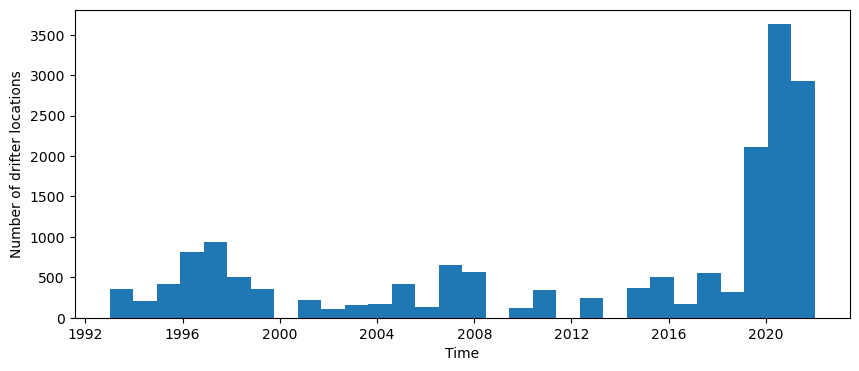

In [5]:
plt.figure(figsize=(10,4))
__ = plt.hist(time, bins=30)
plt.ylabel('Number of drifter locations')
plt.xlabel('Time')

In [6]:
start_time = np.array([time[id_drift == np.unique(id_drift)[i]][0] for i in range(len(np.unique(id_drift)))])
start_lon = np.array([lon[id_drift == np.unique(id_drift)[i]][0] for i in range(len(np.unique(id_drift)))])
start_lat = np.array([lat[id_drift == np.unique(id_drift)[i]][0] for i in range(len(np.unique(id_drift)))])

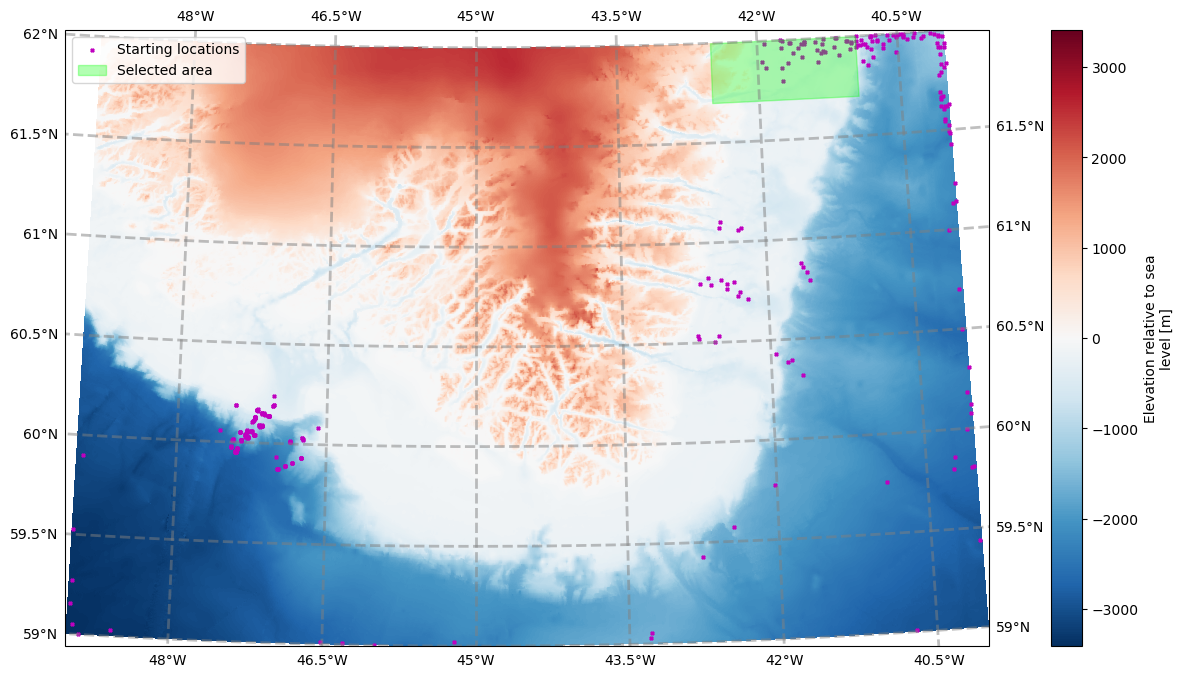

In [11]:
fig = plt.figure(figsize=(16,8))
ax = plt.axes(projection=ccrs.Orthographic(-45, 60))
bathy.elevation.plot.pcolormesh(ax=ax, transform=ccrs.PlateCarree(), shading='flat')
sc = ax.scatter(start_lon, start_lat, s=5, marker='X', c='m', transform=ccrs.PlateCarree(), label='Starting locations')

gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True, linewidth=2, color='gray', alpha=0.5, linestyle='--')

ax.fill_between([-42.5, -40.95], 61.7, 62, transform=ccrs.PlateCarree(), alpha=0.3, color='lime', label='Selected area')

ax.legend(loc='upper left')

In [8]:
len(np.unique(id_drift)[(start_lon>-42.5)&(start_lon<-40.95)&(start_lat>61.7)])

35

In [9]:
good_ids = np.unique(id_drift)[(start_lon>-42.5)&(start_lon<-40.95)&(start_lat>61.7)]

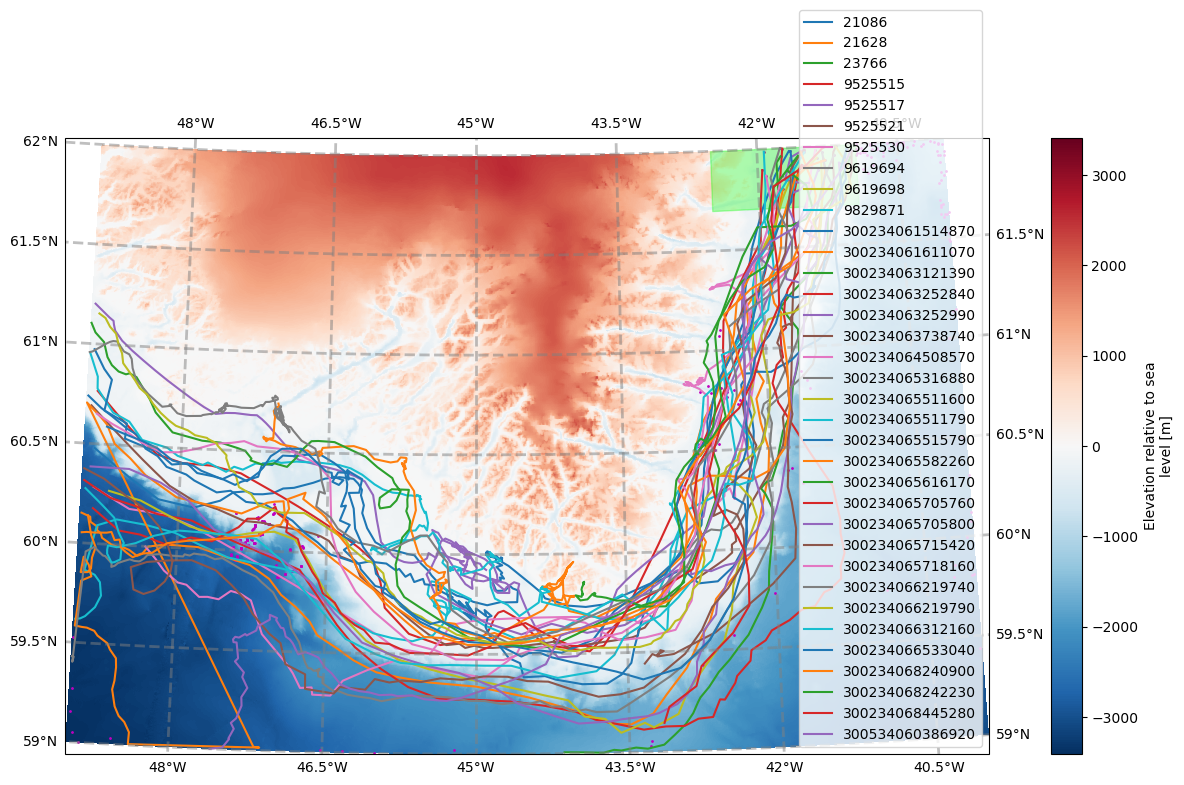

In [13]:
plt.figure(figsize=(16,8))
ax = plt.axes(projection=ccrs.Orthographic(-45, 60))
bathy.elevation.plot(ax=ax, transform=ccrs.PlateCarree())
ax.scatter(start_lon, start_lat, s=1, c='m', transform=ccrs.PlateCarree())

gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=2, color='gray', alpha=0.5, linestyle='--')

ax.fill_between([-42.5, -40.95], 61.7, 62, transform=ccrs.PlateCarree(), alpha=0.3, color='lime')

for i in range(len(good_ids)):
    ax.plot(lon[id_drift==good_ids[i]], lat[id_drift==good_ids[i]], transform=ccrs.PlateCarree(), label=good_ids[i])

ax.legend(loc='lower right')

In [34]:
final_id = good_ids[~np.array([any((lon[id_drift==good_ids[i]]<-48)&(lat[id_drift==good_ids[i]]<59.1)) for i in range(len(good_ids))])]

In [35]:
ID, LON, LAT, TIME = [], [], [], []

for i in range(len(final_id)):
    ID.append(id_drift[id_drift==final_id[i]])
    LON.append(id_drift[id_drift==final_id[i]])
    LAT.append(id_drift[id_drift==final_id[i]])
    TIME.append(id_drift[id_drift==final_id[i]])

In [36]:
ID

[array([21086, 21086, 21086, 21086, 21086, 21086, 21086, 21086, 21086,
        21086, 21086, 21086, 21086, 21086, 21086, 21086, 21086, 21086,
        21086, 21086, 21086, 21086, 21086, 21086, 21086, 21086, 21086,
        21086, 21086, 21086, 21086, 21086, 21086, 21086, 21086, 21086,
        21086, 21086, 21086, 21086, 21086, 21086, 21086, 21086, 21086,
        21086, 21086, 21086, 21086, 21086, 21086, 21086, 21086, 21086,
        21086, 21086, 21086, 21086, 21086, 21086, 21086, 21086, 21086,
        21086, 21086, 21086, 21086, 21086, 21086, 21086, 21086, 21086,
        21086, 21086, 21086, 21086, 21086, 21086, 21086, 21086, 21086,
        21086, 21086, 21086, 21086, 21086, 21086, 21086, 21086, 21086,
        21086, 21086, 21086, 21086, 21086, 21086, 21086, 21086, 21086,
        21086, 21086, 21086, 21086, 21086, 21086, 21086, 21086, 21086,
        21086, 21086, 21086, 21086, 21086, 21086, 21086, 21086, 21086,
        21086, 21086, 21086, 21086, 21086, 21086, 21086, 21086, 21086,
      

Check if the locations are continuous in time, cut when the time between 2 loc is bigger than 6hr